In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets

from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f'PyTorch version: {torch.__version__}\n torchvision version: {torchvision.__version__}')

PyTorch version: 2.6.0+cu124
 torchvision version: 0.21.0+cu124


In [2]:
train_data = datasets.FashionMNIST(
    root='data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 22.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 337kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.15MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.3MB/s]


In [3]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape

torch.Size([1, 28, 28])

Visualizing

torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

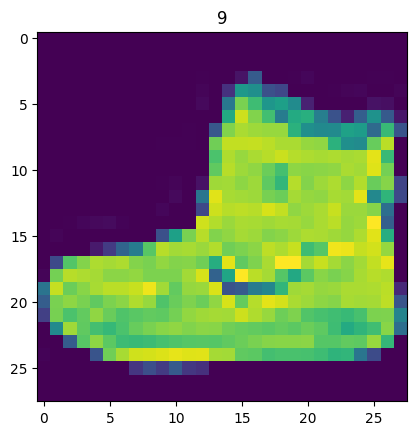

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

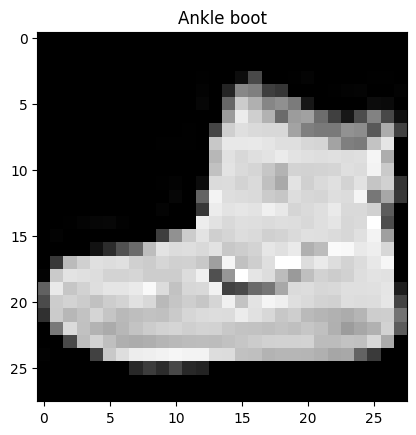

In [10]:
plt.imshow(image.squeeze(), cmap ='gray')
plt.title(class_names[label])

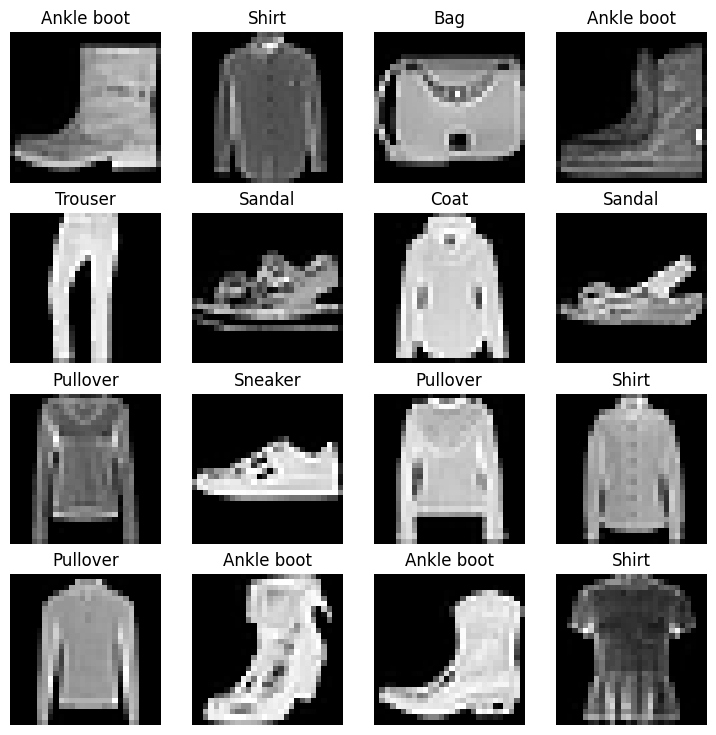

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize= (9, 9))
rows, cols = 4,4
for i in range(1, rows* cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### Prepare Dataloader

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ab35549cc90>,
 <torch.utils.data.dataloader.DataLoader at 0x7ab357e4d390>)

In [14]:
train_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [15]:
len(train_dataloader)

1875

In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

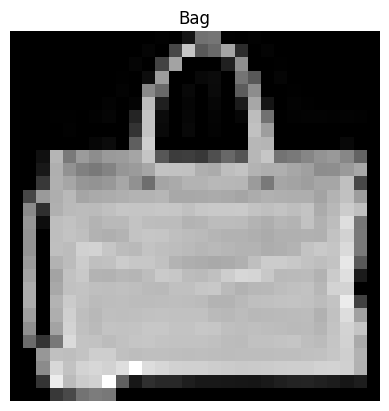

In [17]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)

### Building Model

Basline Model

In [18]:
flatten_model = nn.Flatten()

x= train_features_batch[0]

output = flatten_model(x)

print(x.shape)
print(output.shape)


torch.Size([1, 28, 28])
torch.Size([1, 784])


In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [20]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape = 784,
    hidden_units = 10,
    output_shape = len(class_names)
)
model_0.to('cpu')

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

Loss , optimizer and Evaluation Metrics

In [21]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists')
else:
  print('Downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')

  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

In [22]:
from helper_functions import accuracy_fn

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

Timer function

In [24]:
from timeit import default_timer as timer
def print_train_time(start:float, end: float, device: torch.device = None):
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

Training Loop

In [25]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_loss = 0
  for batch, (X, Y) in enumerate(train_dataloader):
    model_0.train()

    y_preds = model_0(X)

    loss = loss_fn(y_preds, Y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)/len(train_dataloader.dataset)} samples. ")

  train_loss /=len(train_dataloader)

  test_loss, test_acc =0, 0
  model_0.eval()
  with torch.inference_mode():
    for x, y in test_dataloader:
      test_preds = model_0(x)

      test_loss += loss_fn(test_preds, y)

      test_acc += accuracy_fn(y_true= y, y_pred = test_preds.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f'\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n')

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start= train_time_start_on_cpu, end = train_time_end_on_cpu, device = str(next(model_0.parameters()).device) )







  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0.0 samples. 
Looked at 0.21333333333333335 samples. 
Looked at 0.4266666666666667 samples. 
Looked at 0.64 samples. 
Looked at 0.8533333333333334 samples. 

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
----
Looked at 0.0 samples. 
Looked at 0.21333333333333335 samples. 
Looked at 0.4266666666666667 samples. 
Looked at 0.64 samples. 
Looked at 0.8533333333333334 samples. 

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
----
Looked at 0.0 samples. 
Looked at 0.21333333333333335 samples. 
Looked at 0.4266666666666667 samples. 
Looked at 0.64 samples. 
Looked at 0.8533333333333334 samples. 

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Epoch: 3
----
Looked at 0.0 samples. 
Looked at 0.21333333333333335 samples. 
Looked at 0.4266666666666667 samples. 
Looked at 0.64 samples. 
Looked at 0.8533333333333334 samples. 

Train loss: 0.44251 | Test loss: 0.46306, Test acc: 83.75%

Epoch: 4
----
Looked at 0.0 samp

### 4.Make predictions

In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for x, y in data_loader:
      y_preds = model(x)

      loss += loss_fn(y_preds, y)
      acc += accuracy_fn(y_true = y, y_pred = y_preds.argmax(dim= 1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
      "model_name": model.__class__.__name__,
      "model_loss": loss.item(),
      "model_acc": acc
  }

model_0_results = eval_model(model= model_0, data_loader= test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46279820799827576,
 'model_acc': 83.64616613418531}

### Setup device Agnostic code

In [27]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Model 1

In [28]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)



In [29]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 784, hidden_units = 10, output_shape = len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

### Setup loss, optimizer and evalution metrics

In [30]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

###Functioning Training and Test Loops

In [31]:
def train_step(model: torch.nn.Module, data_loader : torch.utils.data.DataLoader, loss_fn : torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn: accuracy_fn, device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X, Y) in enumerate(data_loader):
    x = X.to(device)
    y = Y.to(device)

    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)


  print(f"Train loss: {train_loss:.5f} | Train accuarcy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader, model: torch.nn.Module, loss_fn: torch.nn.Module, accuracy_fn, device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)

  model.eval()

  with torch.inference_mode():
    for X, Y in data_loader:
      x, y = X.to(device), Y.to(device)

      test_preds = model(x)

      test_loss += loss_fn(test_preds, y)

      test_acc += accuracy_fn(y_true= y, y_pred = test_preds.argmax(dim =1))

  test_loss /= len(data_loader)
  test_acc /= len(data_loader)


  print(f"Test loss: {test_loss:.5f} |  Test accuracy: {test_acc:.2f}%\n")

In [32]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [33]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 44.575 seconds


In [35]:
torch.manual_seed(42)
model_1_results = eval_model(model = model_1, data_loader = test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [36]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn : torch.nn.Module, accuracy_fn , device: torch.device = device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, Y in data_loader:
      x, y = X.to(device), Y.to(device)

      y_preds = model(x)

      loss += loss_fn(y_preds, y)

      acc += accuracy_fn(y_true = y, y_pred = y_preds.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {
      "model_name": model.__class__.__name__,
      "model_loss": loss.item(),
      "model_acc": acc
  }

model_1_results = eval_model(model= model_1, data_loader = test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device)
model_1_results



{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [37]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46279820799827576,
 'model_acc': 83.64616613418531}

### Model 2: Building CNN(convolution neural network)

In [38]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels= hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding =1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units, out_channels = hidden_units, kernel_size = 3, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride =2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
   )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 *7, out_features = output_shape)
    )
  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)

    return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units = 10, output_shape = len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [39]:
torch.manual_seed(42)

images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]
print(images.shape)
print(test_image.shape)
print(test_image)

torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.

In [41]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=  3, out_channels= 10, kernel_size = 3, stride=1, padding=0)
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [46]:
test_image.shape

torch.Size([3, 64, 64])

In [42]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [45]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [48]:
torch.manual_seed(42)
conv_layer_2 = nn.Conv2d(in_channels=3, out_channels= 10, kernel_size = (5,5), stride=2, padding=0)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [50]:
conv_layer_2.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
                        [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
                        [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
                        [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
                        [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],
              
                       [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
                        [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
                        [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
                        [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
                        [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],
              
                       [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
                        [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
                        [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
                     

In [51]:
print(f'conv_layer_2 weight shape: {conv_layer_2.weight.shape}')
print(conv_layer_2.bias.shape)

conv_layer_2 weight shape: torch.Size([10, 3, 5, 5])
torch.Size([10])


In [54]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(test_image_through_conv.shape)
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(test_image_through_conv_and_max_pool.shape)

torch.Size([1, 10, 62, 62])
torch.Size([1, 10, 31, 31])


In [55]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_2.parameters(), lr=0.1)

In [56]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(epoch)

  train_step(data_loader = train_dataloader, model = model_2, loss_fn = loss_fn, optimizer = optimizer, accuracy_fn = accuracy_fn, device = device)
  test_step(data_loader = test_dataloader, model= model_2, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2, end = train_time_end_model_2, device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

0
Train loss: 2.08523 | Train accuracy: 19.45%
Test loss: 0.61791 | Test accuracy: 77.33%

1
Train loss: 0.46267 | Train accuracy: 83.11%
Test loss: 0.40740 | Test accuracy: 84.96%

2
Train loss: 0.37268 | Train accuracy: 86.36%
Test loss: 0.36544 | Test accuracy: 86.96%

Train time on cpu: 224.317 seconds


In [58]:
model_2_results = eval_model(model= model_2, data_loader = test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3654448688030243,
 'model_acc': 86.96086261980831}

### Compare model results

In [59]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.462798,83.646166
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.365445,86.960863


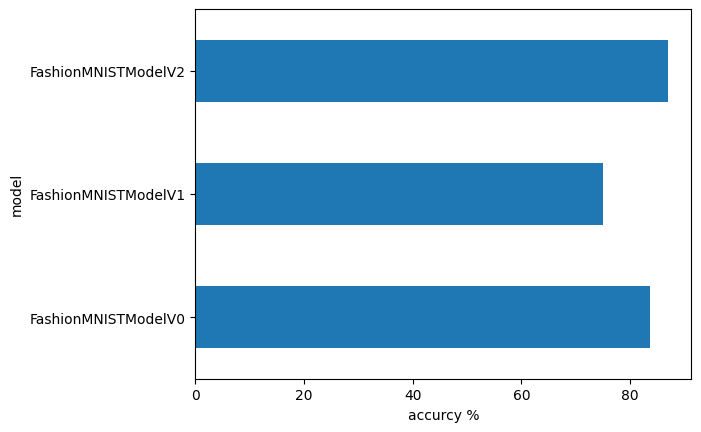

In [60]:
compare_results.set_index("model_name")['model_acc'].plot(kind="barh")
plt.xlabel("accurcy %")
plt.ylabel("model");

##Make and Evaluate random predictions

In [62]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim= 0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim =0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [63]:
import random

random.seed(42)
test_samples = []

test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

print(test_samples[0].shape)

torch.Size([1, 28, 28])


In [64]:
pred_probs = make_predictions(model= model_2, data = test_samples)
pred_probs[:2]

tensor([[1.7860e-06, 5.9805e-06, 1.6763e-06, 3.1287e-07, 1.6832e-06, 9.9649e-01,
         1.9815e-06, 8.4949e-05, 7.4878e-05, 3.3375e-03],
        [8.6380e-02, 3.4042e-01, 6.9004e-03, 5.0370e-01, 2.9708e-02, 1.4443e-03,
         2.8423e-02, 1.7652e-03, 1.0574e-03, 2.0571e-04]])

In [66]:

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

In [67]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 3, 7, 4, 3, 0, 4, 7, 1]))

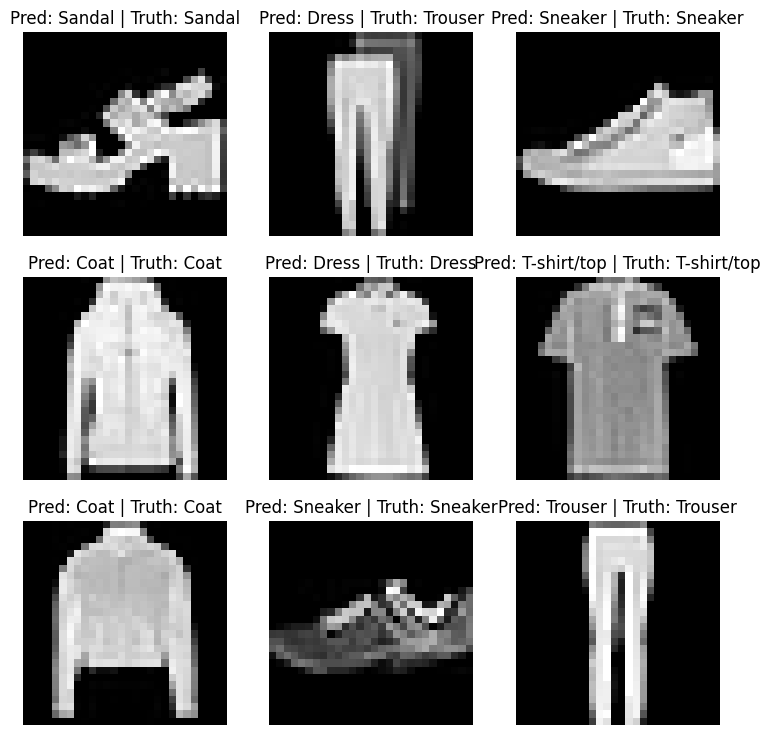

In [71]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]
  plt.title(f"Pred: {pred_label} | Truth: {truth_label}")
  plt.axis("off")


### Confusion Matrix

In [74]:
from tqdm.auto import tqdm

y_preds = []

model_2.eval()
with torch.inference_mode():
  for X, Y in tqdm(test_dataloader, desc="Making predictions"):
    x, y = X.to(device), Y.to(device)

    y_logit = model_2(x)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [75]:
try:
  import trochmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.0 MB/s eta 0:00:00
mlxtend version: 0.23.4


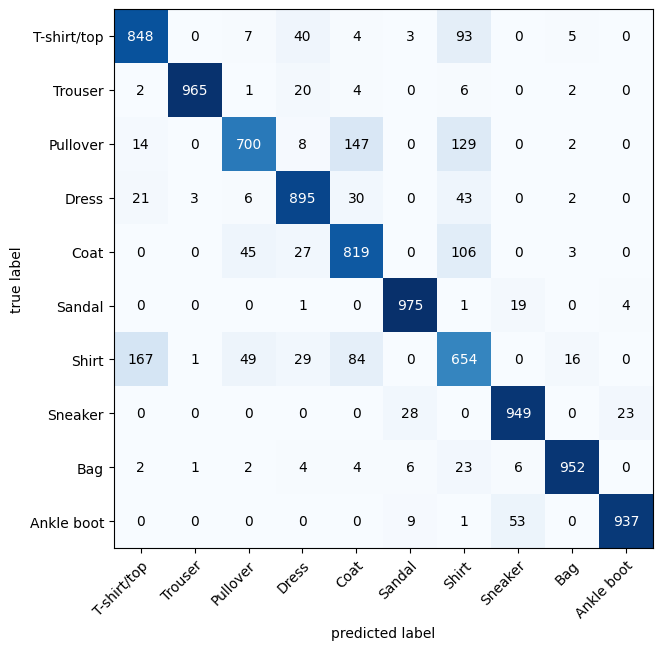

In [76]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names), task = "multiclass" )
confmat_tensor = confmat(preds= y_pred_tensor, target= test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10, 7)

)

###Save and Load Best Model

In [78]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok = True)

MODEL_NAME = "pytorch_computer_vision_model_2_fashionMNIST.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_2.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models/pytorch_computer_vision_model_2_fashionMNIST.pth


In [81]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units = 10, output_shape= 10)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2 = loaded_model_2.to(device)

In [82]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3654448688030243,
 'model_acc': 86.96086261980831}

In [83]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3654448688030243,
 'model_acc': 86.96086261980831}

In [85]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-08,
              rtol = 0.0001)

tensor(True)